In [53]:
import pandas as pd
import os
import numpy as np


In [54]:
data_df = pd.read_csv('data-points.csv')

print("Shape:", data_df.shape)

data_df.head(2)

Shape: (50, 2)


,x,y
0,0.000,0.706
1,0.128,0.288


In [55]:
x = data_df.x.values
X = x[:,np.newaxis]
y = data_df.y.values


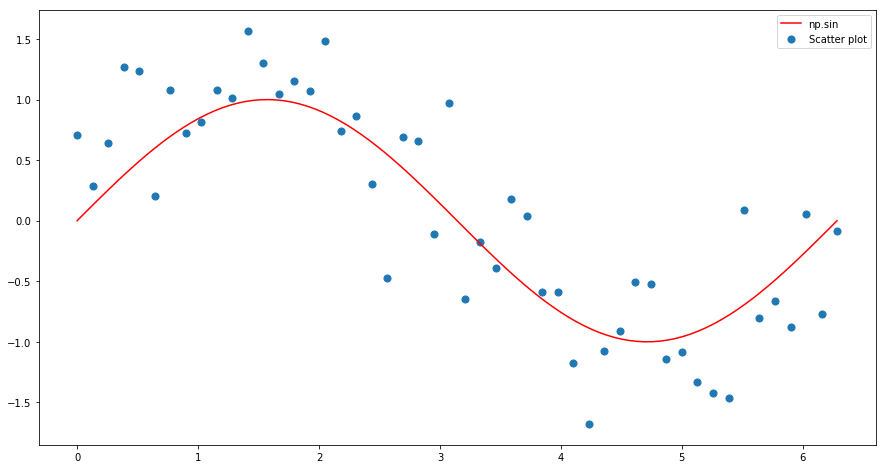

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(15,8))

plt.scatter(x,y,label='Scatter plot', s=50)

# Draw a sin function
x_values = np.linspace(x.min(),x.max(),num=100)
y_values = np.sin(x_values)
plt.plot(x_values,y_values,label='np.sin',c='r')

plt.legend()
plt.show()


In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10,include_bias=False)

X_poly = poly.fit_transform(X)


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_rescaled = scaler.fit_transform(X_poly)



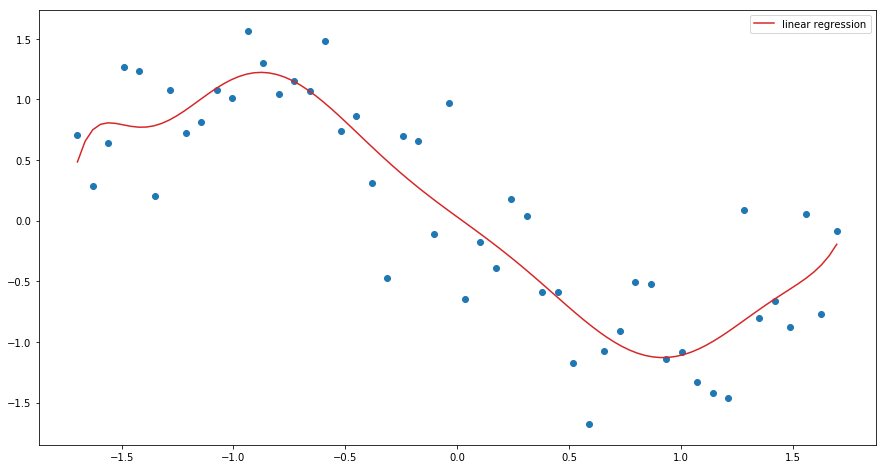

In [65]:
# Perform a linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_rescaled, y)


# Pass sample x values through the preprocessing steps
X_values_rescaled = scaler.transform(
    poly.transform(x_values[:, np.newaxis])
)
y_values_lr = lr.predict(X_values_rescaled)


plt.figure(figsize=(15,8))

plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_lr, c='C3', label='linear regression')

plt.legend()

plt.show()

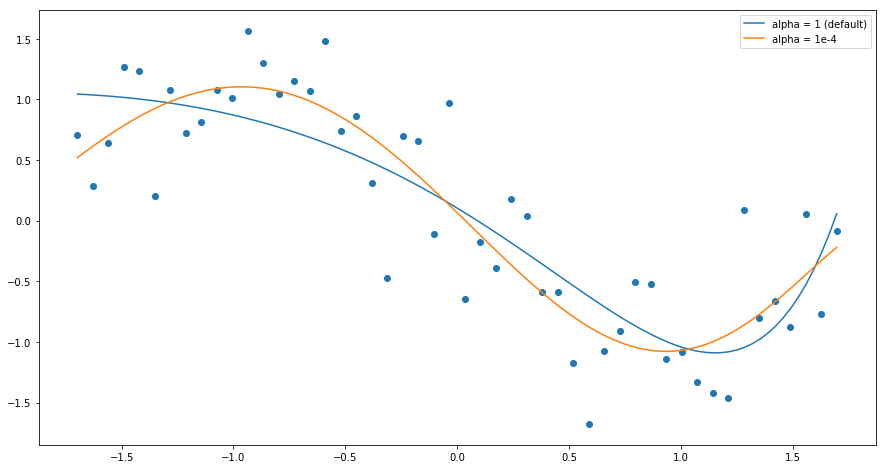

In [76]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_rescaled,y)

ridge2 = Ridge(alpha=1e-4)
ridge2.fit(X_rescaled, y)


# Pass sample x values through the preprocessing steps
X_values_rescaled = scaler.transform(
    poly.transform(x_values[:, np.newaxis])
)


y_values_ridge = ridge.predict(X_values_rescaled)
y_values_ridge2 = ridge2.predict(X_values_rescaled)


plt.figure(figsize=(15,8))

plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_ridge, label='alpha = 1 (default)')
plt.plot(X_values_rescaled[:, 0], y_values_ridge2, label='alpha = 1e-4')

plt.legend()

plt.show()

In [78]:
# Linear regression coefficients
features = poly.get_feature_names()
for feature, coef in zip(features, lr.coef_):
    print('{:<6}: {:>10.1f}'.format(feature, coef))

x0    :        6.3
x0^2  :     -156.5
x0^3  :     1604.8
x0^4  :    -8250.8
x0^5  :    24145.5
x0^6  :   -42951.3
x0^7  :    47245.0
x0^8  :   -31285.6
x0^9  :    11373.1
x0^10 :    -1731.0


In [79]:
# Ridge regression coefficients
for feature, coef in zip(features, ridge2.coef_):
    print('{:<6}: {:>4.1f}'.format(feature, coef))


x0    :  1.4
x0^2  : -1.6
x0^3  : -6.8
x0^4  :  3.9
x0^5  :  4.5
x0^6  :  0.5
x0^7  : -1.7
x0^8  : -1.1
x0^9  :  0.2
x0^10 :  0.1


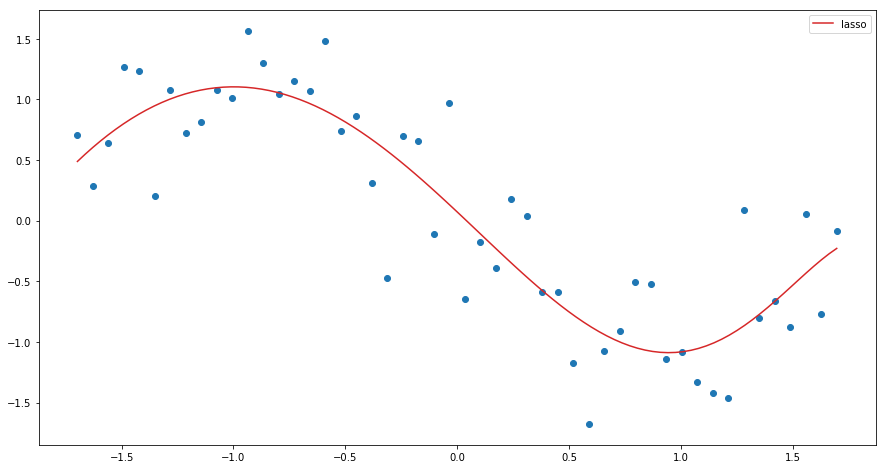

In [93]:
from sklearn.linear_model import Lasso

# Lasso regression
lasso = Lasso(alpha=1e-4, max_iter=1e5)
lasso.fit(X_rescaled, y)


# Compute predictions
y_values_lasso = lasso.predict(X_values_rescaled)

# Plot the model
plt.figure(figsize=(15,8))
plt.scatter(X_rescaled[:, 0], y)
plt.plot(X_values_rescaled[:, 0], y_values_lasso, c='C3', label='lasso')
plt.legend()
plt.show()


In [94]:
# Lasso regression coefficients
for feature, coef in zip(features, lasso.coef_):
    print('{:<6}: {:>4.1f}'.format(feature, coef))

x0    :  1.8
x0^2  : -4.4
x0^3  : -0.2
x0^4  :  0.0
x0^5  :  2.2
x0^6  :  0.9
x0^7  :  0.0
x0^8  :  0.0
x0^9  : -0.0
x0^10 : -0.7
